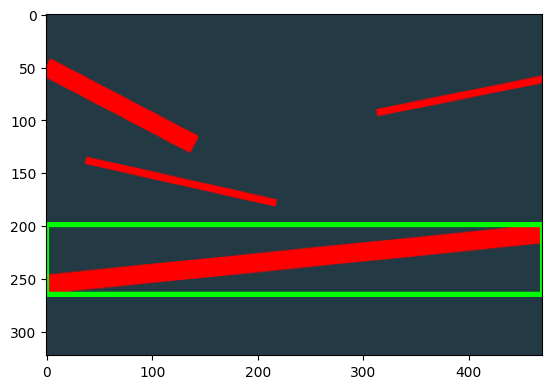

A red line was detected 58 pixels from the bottom border of the image.


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_red_line(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the range of red color in HSV
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])

    # Threshold the HSV image to get only red colors
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Find the contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contour was found
    if len(contours) > 0:
        # Find the contour with the largest area
        c = max(contours, key=cv2.contourArea)

        # Find the bounding rectangle of the contour
        x, y, w, h = cv2.boundingRect(c)

        # Calculate the distance from the bottom border of the image
        distance_from_bottom = img.shape[0] - (y + h)

        # Draw a rectangle around the detected red line
        img_with_rectangle = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 255, 0), 3)

        # Convert the image from BGR to RGB color space
        img_with_rectangle = cv2.cvtColor(img_with_rectangle, cv2.COLOR_BGR2RGB)

        # Plot the image with Matplotlib
        plt.imshow(img_with_rectangle)
        plt.show()

        # Return that a red line was found and its distance from the bottom border of the image
        return True, distance_from_bottom
    else:
        # Return that no red line was found
        return False, None

# Example usage:
found_red_line, distance_from_bottom = detect_red_line('Task 1/Screenshot 2023-09-03 143627.png')
if found_red_line:
    print(f'A red line was detected {distance_from_bottom} pixels from the bottom border of the image.')
else:
    print('No red line was detected in the image.')

